# Practical session 1

## 1 Signal generation and sampling

### Importing libraries

In [835]:
import numpy as np
import numpy.fft
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile
import time

### 1.1 Signal generation

#### Question 1

In [836]:
f_0 = 2
f_1 = 3 * f_0

def x(t):
    return np.sin(2 * np.pi * f_0 * t) + np.cos(2 * np.pi * f_1 * t)

#### Question 2

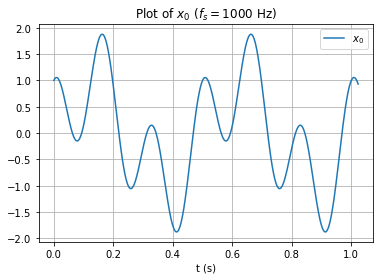

In [837]:
f_s0 = 1000
N_0 = 1024

t_0 = np.arange(N_0) / f_s0
x_0 = x(t_0)

pl.figure()
pl.grid()
pl.title("Plot of $x_0$ ($f_s = 1000$ Hz)")
pl.xlabel("t (s)")
pl.plot(t_0, x_0, label = "$x_0$")
pl.legend()

The larger frequency of $x$ is $6$ Hz and $f_s = 1000 >> 12 = 2*6$, which is why this sample of $x$ gives a satisfying plot (we can clearly see the oscillation of $2$ Hz and $6$ Hz in this $1$ sec window). Indeed, by the Nyquist theorem, the sampling frequency is large enough (by a factor $10^2$ !) to capture all the information in the signal.

#### Question 3

In [838]:
f_s = 20

t_n = np.arange(f_s) / f_s
x_n = x(t_n)

#### Question 4

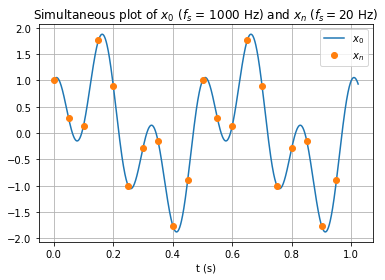

In [839]:
pl.figure()
pl.grid()
pl.title("Simultaneous plot of $x_0$ ($f_s$ = 1000 Hz) and $x_n$ ($f_s = 20$ Hz)")
pl.xlabel("t (s)")
pl.plot(t_0, x_0, label = "$x_0$")
pl.plot(t_n, x_n, 'o', label = "$x_n$")
pl.legend()

Here, we still have $f_s = 20 > 12 = 2f_{max}$ which means that theoretically, it is possible to reconstruct the signal from this sampling. Moreover, by looking at the dots corresponding to the new sampling it is possible to figure out an approximate shape of the signal. However, the sampling frequency is too close to $2f_{max}$, which is why the raw sample doesn't give a satisfying representation of the signal.

### 1.2 Signal reconstruction

#### Question 1

By Nyquist's theorem, we need to have $f_s > 2f_{max} = 2*6 = 12$ Hz to be sure that the signal can be reconstructed.

#### Question 2

In [840]:
def rec_sinc(xs, ts, fs, t):
    return sum([xk * np.sinc(fs * (t - tk)) for xk, tk in zip(xs, ts)])

To reconstruct the signal, we compute the (truncated) convolution between the sampling and a cardinal sine as stated in the Nyquist/Shannon sampling theorem. However, it is not perfect since we only have a finite sampling.

#### Question 3

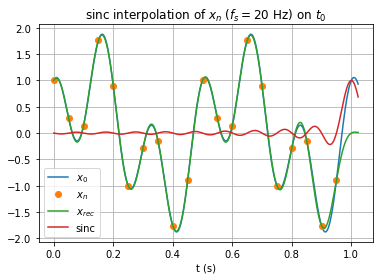

In [841]:
f_s = 20

t_n = np.arange(f_s) / f_s
x_n = x(t_n)

x_rec = rec_sinc(x_n, t_n, f_s, t_0)

pl.figure()
pl.grid()
pl.title("sinc interpolation of $x_n$ ($f_s = 20$ Hz) on $t_0$")
pl.xlabel("t (s)")
pl.plot(t_0, x_0, label = "$x_0$")
pl.plot(t_n, x_n, 'o', label = "$x_n$")
pl.plot(t_0, x_rec, label = "$x_{rec}$")
pl.plot(t_0, np.sinc(f_s * (t_0 - 1)), label = "sinc")
pl.legend()

Since the convolution is truncated, the reconstruction is not perfect. However, we are doing a convolution with a cardinal sine, so most of the weight is put on the values that are very close to the point around which the convolution is made (cf plot).
<br>This explains why the center of the window is precisely reconstructed.
<br>It is also quite precise on the left of the window because the values of the real signal that are just to the left are close to zero. 
<br>But on the right, a lot of positive weight is put on negative values to reconstruct the signal at points where it is positive (cf plot), which is why the reconstructed values are much lower than expected on the right of the window.
<br>For high sampling frequencies (cf. next plot), this phenomenon mostly appears after $t = 1$ s (because the gap between the last sampling time and $1$ is ridiculously small) and the reconstructed value there is almost $0$ (which is what we asked the computer after all).

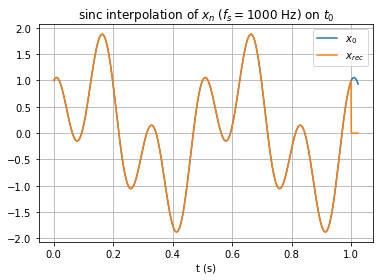

In [842]:
f_s = 1000

t_n = np.arange(f_s) / f_s
x_n = x(t_n)

x_rec = rec_sinc(x_n, t_n, f_s, t_0)

pl.figure()
pl.grid()
pl.title("sinc interpolation of $x_n$ ($f_s = 1000$ Hz) on $t_0$")
pl.xlabel("t (s)")
pl.plot(t_0, x_0, label = "$x_0$")
pl.plot(t_0, x_rec, label = "$x_{rec}$")
pl.legend()

#### Question 4

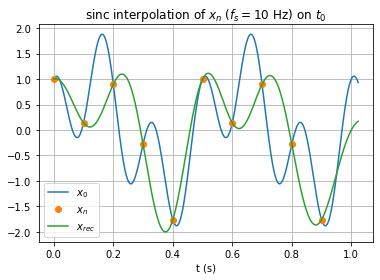

In [843]:
f_s = 10

t_n = np.arange(f_s) / f_s
x_n = x(t_n)

x_rec = rec_sinc(x_n, t_n, f_s, t_0)

pl.figure()
pl.grid()
pl.title("sinc interpolation of $x_n$ ($f_s = 10$ Hz) on $t_0$")
pl.xlabel("t (s)")
pl.plot(t_0, x_0, label = "$x_0$")
pl.plot(t_n, x_n, 'o', label = "$x_n$")
pl.plot(t_0, x_rec, label = "$x_{rec}$")
pl.legend()

Since $f_s = 10 < 12$ Hz, as expected, some information is lost and the reconstructed signal is not accurate.
<br>However, it looks like the reconstructed signal is trying to follow the real one (because the sampling frequency is not too far from $12$ Hz) but he is quite bad at it. 

### 1.3 Audio signal generation


#### Question 1

In [844]:
f_0 = 425
f_s = 8000

def sine(f, t):
    return np.sin(2 * np.pi * f * t)

t_0 = np.arange(f_s) / f_s
x_0 = 0.5 * sine(f_0, t_0)

sp.io.wavfile.write("Data/sine.wav", f_s, x_0)

#### Question 2

In [845]:
def get_note(m, fs, l):
    f_m = 440 * 2 ** ((m-69) / 12)
    t = np.arange(fs * l) / fs
    x = sine(f_m, t)
    return x

#### Question 3

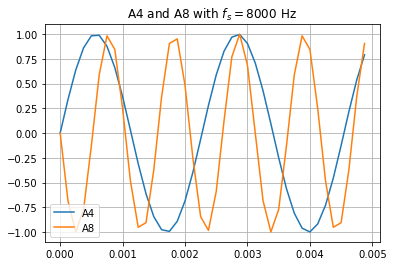

In [846]:
A4_short = get_note(69, f_s, 0.005)
A8_short = get_note(117, f_s, 0.005)

t = np.arange(0.005 * f_s) / f_s

pl.figure()
pl.grid()
pl.title("A4 and A8 with $f_s = 8000$ Hz")
pl.plot(t, A4_short, label = "A4")
pl.plot(t, A8_short, label = "A8")
pl.legend()

A4 = get_note(69, f_s, 1)
A8 = get_note(117, f_s, 1)

sp.io.wavfile.write("Data/A4.wav", f_s, A4)
sp.io.wavfile.write("Data/A8.wav", f_s, A8)

The frequency of the physical A8 is $f_{117} = 7040$ Hz. However, on the plot above, the A8 that we have sampled has a frequency of approximately $1000$ Hz. It comes from the fact that $f_s = 8000 < 2 * 7040$, which causes some aliasing because of Nyquist's theorem. 
<br>When hearing the sound, it feels like A8 is at most an octave higher than A4, which is obviously not the case (physically).

#### Question 4

In [847]:
notes_m = [70, 72, 68, 56, 63]
notes_list = []

for m in notes_m:
    notes_list.append(get_note(m, f_s, 1))

x_seq = np.concatenate(notes_list)

sp.io.wavfile.write("Data/seq.wav", f_s, x_seq)

Unfortunately I don't know where it comes from.

#### Question 5

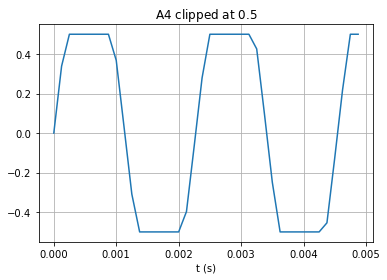

In [848]:
A4 = get_note(69, f_s, 1)

A4clip1 = np.clip(A4, -0.1, 0.1)
A4clip3 = np.clip(A4, -0.3, 0.3)
A4clip5 = np.clip(A4, -0.5, 0.5)
A4clip8 = np.clip(A4, -0.8, 0.8)

A4_short = get_note(69, f_s, 0.005)
A4clip_short = np.clip(A4_short, -0.5, 0.5)

t = np.arange(0.005 * f_s) / f_s

pl.figure()
pl.grid()
pl.title("A4 clipped at $0.5$")
pl.xlabel("t (s)")
pl.plot(t, A4clip_short, label = "A4")

sp.io.wavfile.write("Data/A4clip1.wav", f_s, A4clip1)
sp.io.wavfile.write("Data/A4clip3.wav", f_s, A4clip3)
sp.io.wavfile.write("Data/A4clip5.wav", f_s, A4clip5)
sp.io.wavfile.write("Data/A4clip8.wav", f_s, A4clip8)

The lower the clipping, the more the signal sounds distorted. However, the fundamental frequency stays the same.
<br>Thus, saturation will add high frequencies to the signal because it will create singularities where the value is changed by the clipping.

#### Question 6

Let's start by plotting the signal for smaller $f_0$ and $c$ since there are way too much oscillations to visualize it for $f_0 = 100$ and $c = 500$.

Text(0.5, 0, 't (s)')

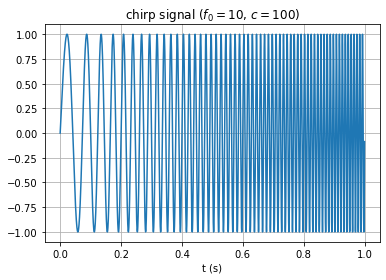

In [849]:
f_0 = 10
c = 100
f_s = 8000

def x_chirp(t):
    return np.sin(2 * np.pi * (f_0 * t + c / 2 * t ** 2))

t_0 = np.arange(f_s) / f_s
x_c = x_chirp(t_0)

pl.figure()
pl.grid()
pl.title("chirp signal ($f_0 = 10$, $c = 100$)")
pl.plot(t_0, x_c)
pl.xlabel("t (s)")

In [850]:
f_0 = 100
c = 500
f_s = 8000

t_0 = np.arange(f_s) / f_s
x_c = x_chirp(t_0)

sp.io.wavfile.write("Data/chirp.wav", f_s, x_c)

A chirp is actually a sinus whose "frequency" grows linearly with time at a speed of $\frac c 2$, starting from $f_0$ at $t = 0$. When hearing the sound, we can clearly hear the frequency augmentation.

## 2 Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT)

### 2.1  Basis functions and Discrete Fourier Transform Matrix

#### Question 1

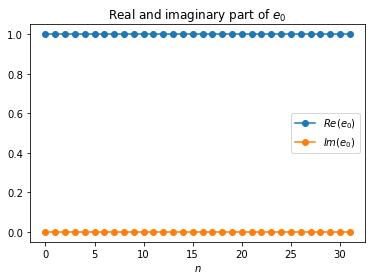

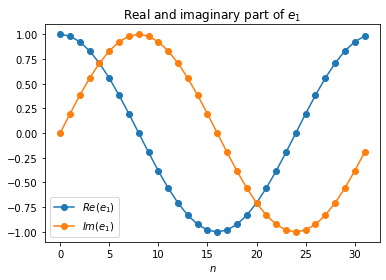

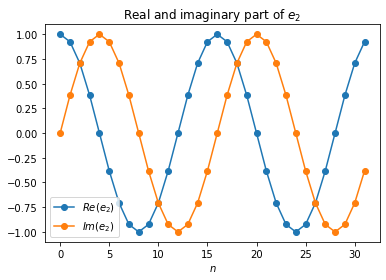

In [851]:
N = 32

def e(i, k):
    return np.exp(2 * 1j * np.pi * k * i / N)

n = np.arange(N)

for i in range(3):
    pl.figure()
    pl.title("Real and imaginary part of $e_{}$".format(i))
    pl.plot(n, np.real(e(i, n)), '-o', label = "$Re(e_{})$".format(i))
    pl.plot(n, np.imag(e(i, n)), '-o', label = "$Im(e_{})$".format(i))
    pl.legend()
    pl.xlabel("$n$")

#### Question 2

Text(0.5, 1.0, '$Im(F_{32})$')

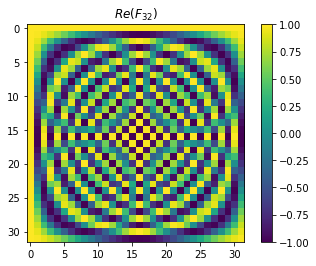

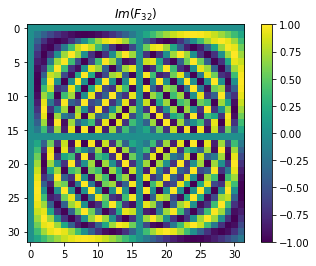

In [852]:
ks = np.arange(N)
F = np.exp(-2 * 1j * np.pi * ks[:, None] * ks[None, :] / N)

pl.figure()
pl.imshow(np.real(F))
pl.colorbar()
pl.title("$Re(F_{32})$")
pl.figure()
pl.imshow(np.imag(F))
pl.colorbar()
pl.title("$Im(F_{32})$")

#### Question 3

Text(0.5, 0, 'k')

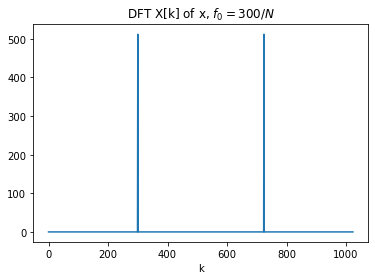

In [853]:
N = 1024
k = 300

f_0 = k / N

def x(n):
    return np.cos(2 * np.pi * f_0 * n)

ns = np.arange(N)
xs = x(ns)
F = np.exp(-2 * 1j * np.pi * ns[:, None] * ns[None, :] / N)
DFT = np.dot(F, xs)

pl.figure()
pl.title("DFT X[k] of x, $f_0=300/N$")
pl.plot(ns, abs(DFT))
pl.xlabel("k")

As expected, we get two diracs since the Fourier transform of $x$ is two diracs (one at $f_0$ and the other at $-f_0$). However, the DFT is periodic, which is why the second dirac is at $N - 300$ which represents $-300$.

#### Question 4

Text(0.5, 0, 'k')

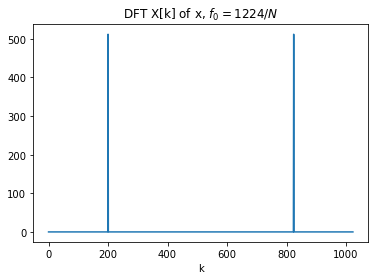

In [854]:
N = 1024
k = 1224

f_0 = k / N

ns = np.arange(N)
xs = x(ns)
F = np.exp(-2 * 1j * np.pi * ns[:, None] * ns[None, :] / N)
DFT = np.dot(F, xs)

pl.figure()
pl.title("DFT X[k] of x, $f_0=1224/N$")
pl.plot(ns, abs(DFT))
pl.xlabel("k")

We still get two diracs, but the spectrum is slightly harder to read. Indeed, since $1224$ is bigger than the length of the sampled signal, we get a first dirac at $1224$ mod $1024$ = $200$, and a second one at $N - 200$.

#### Question 5

Text(0.5, 0, 'k')

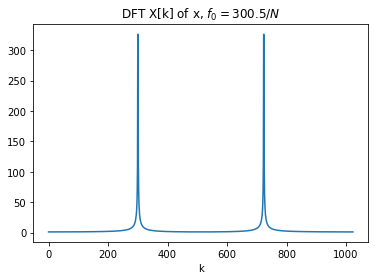

In [855]:
N = 1024
k = 300.5

f_0 = k / N

ns = np.arange(N)
xs = x(ns)
F = np.exp(-2 * 1j * np.pi * ns[:, None] * ns[None, :] / N)
DFT = np.dot(F, xs)

pl.figure()
pl.title("DFT X[k] of x, $f_0=300.5/N$")
pl.plot(ns, abs(DFT))
pl.xlabel("k")

This time, since the frequency of the signal is not one of the sampled frequencies, the diracs are not perfect and some other frequencies appear near the two main ones.

### 2.2 Fast Fourier Transform

#### Question 1

In [856]:
start = time.perf_counter()
DFT = np.dot(F, xs)
t_DFT = time.perf_counter() - start
print("DFT : {} s".format(t_DFT))

start = time.perf_counter()
F = np.exp(-2 * 1j * np.pi * ns[:, None] * ns[None, :] / N)
DFT = np.dot(F, xs)
t_DFT_matrix = time.perf_counter() - start
print("DFT + matrix : {} s".format(t_DFT_matrix))

DFT : 0.0014627999917138368 s
DFT + matrix : 0.07638980000047013 s


When the matrix is precomputed, the DFT is around 100 times faster than when the matrix has to be computed.

#### Question 2

In [857]:
start = time.perf_counter()
FFT = np.fft.fft(xs)
t_FFT = time.perf_counter() - start
print("FFT : {} s".format(t_FFT))

FFT : 0.0002806999837048352 s


For N = 1024, the FFT is around 10 times faster than the DFT (if the matrix is already computed) !

#### Question 3

Text(0, 0.5, 'time (s)')

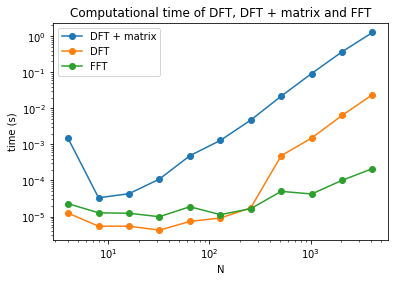

In [858]:
Ns = np.zeros(11)
ts_DFT = np.zeros(11)
ts_DFT_matrix = np.zeros(11)
ts_FFT = np.zeros(11)

for k in range(11):
    N = 2 ** (k + 2)
    Ns[k] = N
    ns = np.arange(N)
    xs = x(ns)
    
    start = time.perf_counter()
    F = np.exp(-2 * 1j * np.pi * ns[:, None] * ns[None, :] / N)
    DFT = np.dot(F, xs)
    t_DFT_matrix = time.perf_counter() - start
    ts_DFT_matrix[k] = t_DFT_matrix
    
    start = time.perf_counter()
    DFT = np.dot(F, xs)
    t_DFT = time.perf_counter() - start
    ts_DFT[k] = t_DFT

    start = time.perf_counter()
    FFT = np.fft.fft(xs)
    t_FFT = time.perf_counter() - start
    ts_FFT[k] = t_FFT
    
pl.figure()
pl.loglog(Ns, ts_DFT_matrix, '-o', label = "DFT + matrix")
pl.loglog(Ns, ts_DFT, '-o', label = "DFT")
pl.loglog(Ns, ts_FFT, '-o', label = "FFT")
pl.legend()
pl.title("Computational time of DFT, DFT + matrix and FFT")
pl.xlabel("N")
pl.ylabel("time (s)")

Unsurprisingly, the DFT with the matrix computation is always slower than the DFT, and the time ratio stays almost constant (around $10^2$).
<br>Moreover, when $N < 2^8$, the DFT (without) matrix is faster than the FFT. But for $N > 2^8$, the FFT is much faster and the time ratio increases approximately linearly with $N$.
<br> Also, even when $N$ is small, the DFT with matrix computation is slower than the FFT.
<br>Finally, as expected, the asymptotic computational time is quadratic (straight line with slope 2 in log-log) for the DFT (with or without matrix computation) and approximately linear for the FFT (which has a theoretical complexity of $O(Nlog(N))$).

### 2.3  Interpreting signals

#### A4.wav

(435.0, 445.0)

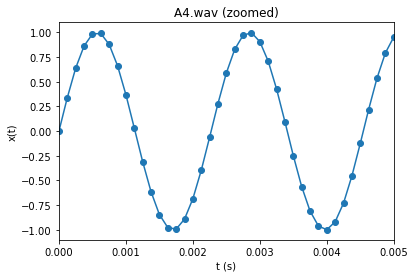

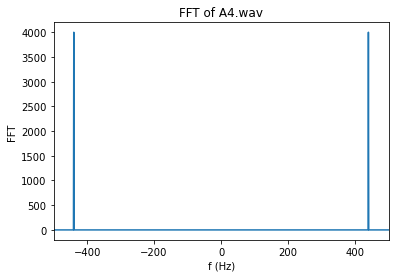

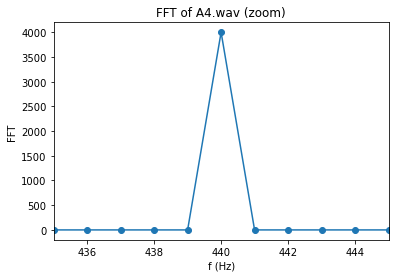

In [859]:
f_s, x = scipy.io.wavfile.read("Data/A4.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("A4.wav (zoomed)")
pl.plot(t, x, '-o')
pl.xlabel("t (s)")
pl.ylabel("x(t)")
pl.xlim(0, 0.005)

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of A4.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(-500, 500)

pl.figure()
pl.title("FFT of A4.wav (zoom)")
pl.plot(freqs, abs(x_fft), '-o')
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(435, 445)

As expected, we get a dirac at $f_{69} = 440$ Hz, which is the frequency of A4. Moreover, this dirac is exact since $440$ is one of the sampled frequencies.

#### A4clip.wav

(435.0, 445.0)

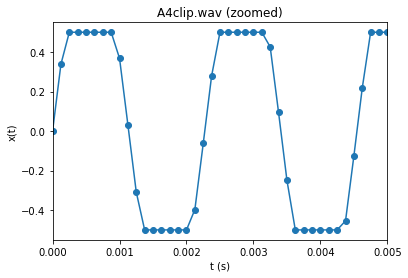

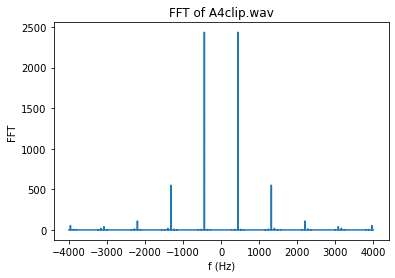

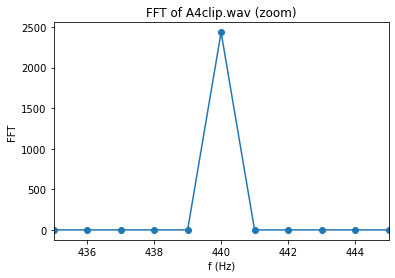

In [860]:
f_s, x = scipy.io.wavfile.read("Data/A4clip5.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("A4clip.wav (zoomed)")
pl.plot(t, x, '-o')
pl.xlabel("t (s)")
pl.ylabel("x(t)")
pl.xlim(0, 0.005)

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of A4clip.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")

pl.figure()
pl.title("FFT of A4clip.wav (zoom)")
pl.plot(freqs, abs(x_fft), '-o')
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(435, 445)

We can see that we still have $f_{69}$ as main frequency, but there are higher frequencies added by clipping because it adds a singularity and thus high frequencies.

#### seq.wav

(-800.0, 800.0)

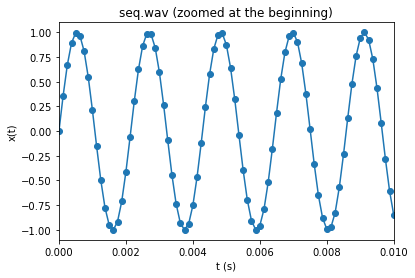

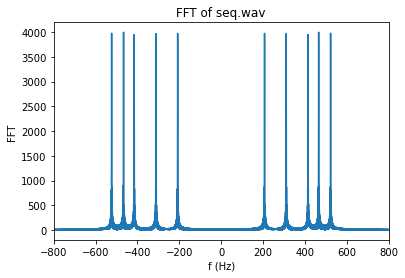

In [861]:
f_s, x = scipy.io.wavfile.read("Data/seq.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("seq.wav (zoomed at the beginning)")
pl.plot(t, x, '-o')
pl.xlabel("t (s)")
pl.ylabel("x(t)")
pl.xlim(0, 0.01)

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of seq.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(-800, 800)

We recover the fact that there are clearly 5 distinct notes in this sequence. However, the spikes are not so clean because we brutally concatenated sines of different frequencies. Let's get the MIDI number of the second lowest note :

(307.0, 315.0)

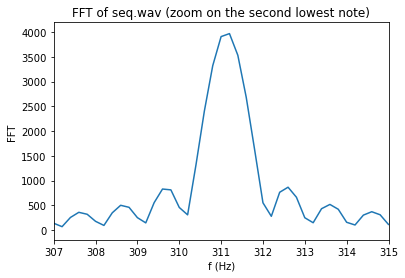

In [862]:
pl.figure()
pl.title("FFT of seq.wav (zoom on the second lowest note)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(307, 315)

In [863]:
print("m =", 69 + 12 * np.log2(311 / 440))

m = 62.99293267927131


The frequency of the note is approximately $f_m = 311$ Hz. By reversing the definition of $f_m$, we recover the MIDI number of the second lowest note, which is $63$ (D#4) !

#### chirp.wav

(0.0, 700.0)

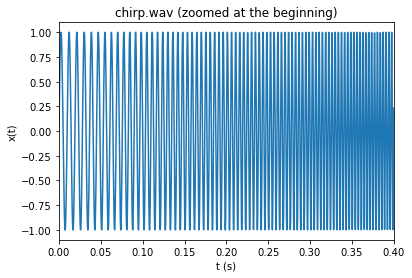

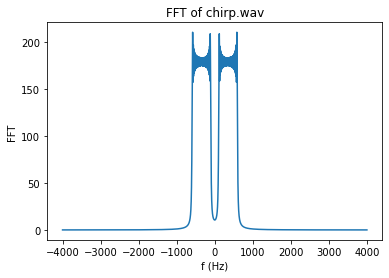

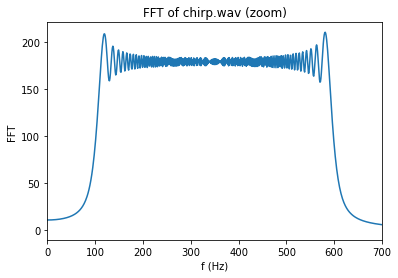

In [864]:
f_s, x = scipy.io.wavfile.read("Data/chirp.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("chirp.wav (zoomed at the beginning)")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")
pl.xlim(0, 0.4)

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of chirp.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")

pl.figure()
pl.title("FFT of chirp.wav (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(0, 700)

The instantaneous frequencies are the ones between $100$ Hz and $600$ Hz according to the FFT. Also, in theory, the instantaneous frequence at time $t$ is $f(t) = \frac d{dt}(f_0t + \frac c 2 t^2) = f_0 + ct$. Thus, the theoretical instantaneous frequencies are the ones between $f_0$ and $f_0 + c$, which is exactly what we found because $f_0 = 100$ Hz and $c = 500.$

We can see that the FFT's amplitude stays away from zero in the whole domain (it is close though), which means that the support of the spectrum is $[-\frac{f_s}2, \frac{f_s}2]$ = $[-4000, 4000]$ Hz whereas its instantaneous frequencies are in $[100, 600]$ Hz only ! 
<br> It must be the prize (in harmonics) to pay to have such a smooth sound.

#### uku.wav

(430.0, 445.0)

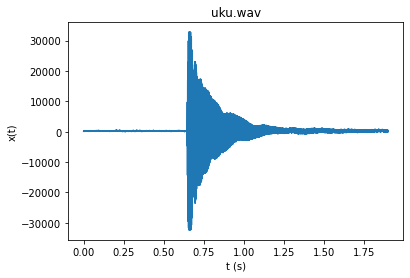

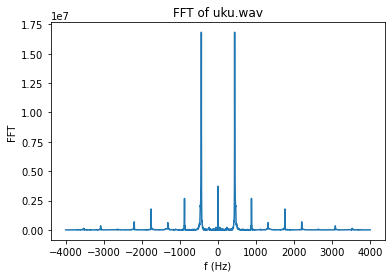

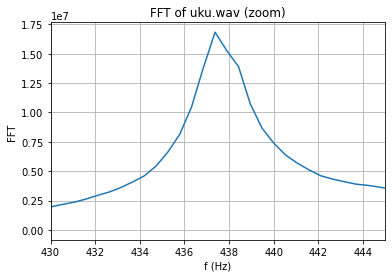

In [865]:
f_s, x = scipy.io.wavfile.read("Data/uku.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("uku.wav")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of uku.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")

pl.figure()
pl.grid()
pl.title("FFT of uku.wav (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(430, 445)

In [866]:
print("m =", 69 + 12 * np.log2(437 / 440))

m = 68.88155707171127


By zooming, we find that the frequency corresponding to the note (the one with maximum amplitude) is approximately $437$ Hz, which corresponds to a MIDI number of $69$ (A4) when rounded up (see calculation in the code). However, it is a bit less than the theoretical frequency of that note wich is $440$ Hz, which means that the ukulele is not well tuned.

#### uku2.wav

(255.0, 260.0)

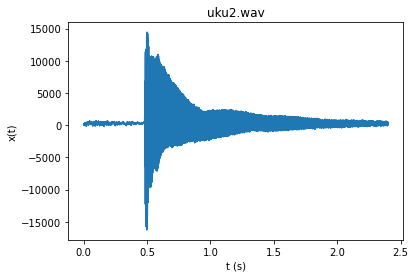

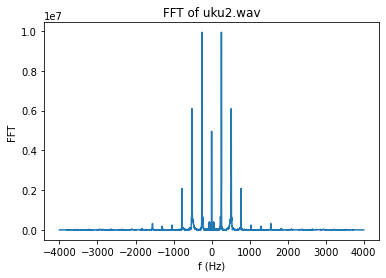

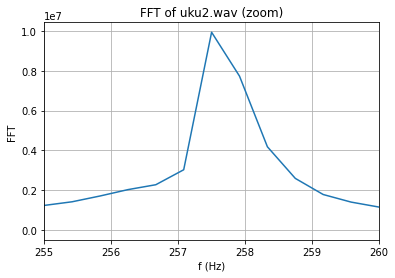

In [867]:
f_s, x = scipy.io.wavfile.read("Data/uku2.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("uku2.wav")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of uku2.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")

pl.figure()
pl.grid()
pl.title("FFT of uku2.wav (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(255, 260)

In [868]:
print("m =", 69 + 12 * np.log2(257.5 / 440))

m = 59.72482690255105


This time, the frequency of the note is approximately $257,5$ Hz, which corresponds to a MIDI number of $60$ (C4) when rounded up. Again, this is a little less than the theoretical frequency which is $261,63$ Hz.

#### drum.wav

(-400.0, 400.0)

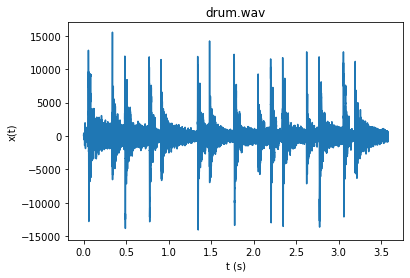

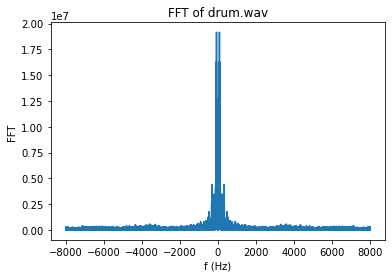

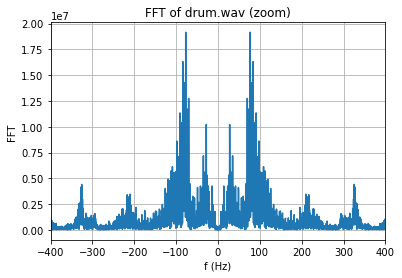

In [869]:
f_s, x = scipy.io.wavfile.read("Data/drum.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("drum.wav")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of drum.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")

pl.figure()
pl.grid()
pl.title("FFT of drum.wav (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(-400, 400)

By zooming on the FFT, we can see two low-frequency spikes ($75$ Hz and $25$ Hz) that must correspond to the bass drum and two high-frequency spikes ($320$ Hz and $210$ Hz) that correspond to the cymbal.

#### stairway.wav

(100.0, 120.0)

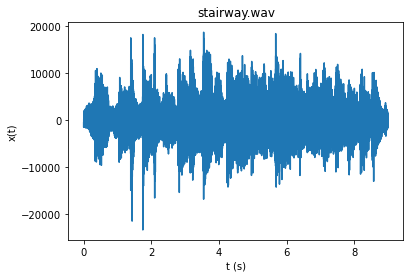

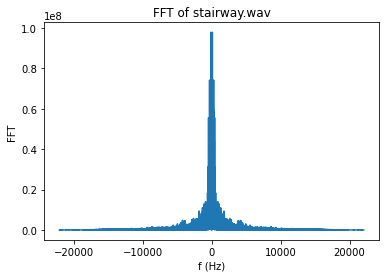

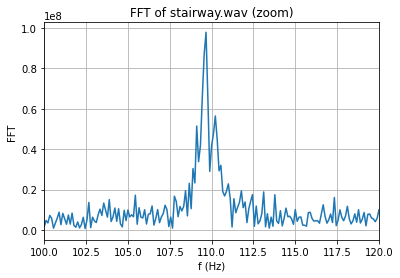

In [870]:
f_s, x = scipy.io.wavfile.read("Data/stairway.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("stairway.wav")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of stairway.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")

pl.figure()
pl.grid()
pl.title("FFT of stairway.wav (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(100, 120)

In [871]:
print("m =", 69 + 12 * np.log2(110 / 440))

m = 45.0


The mode (most played note in the sequence) corresponds to the frequency with the highest amplitude, which is $110$ Hz, which corresponds to a MIDI number of $45$ (A2).

#### stairwayb.wav

Text(0, 0.5, 'FFT')

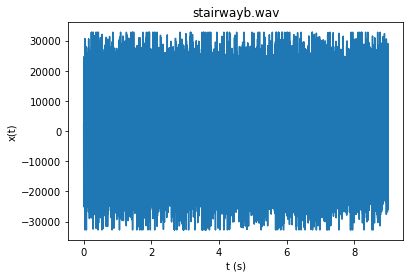

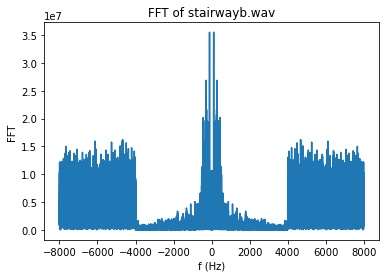

In [872]:
f_s, x = scipy.io.wavfile.read("Data/stairwayb.wav")
t = np.arange(len(x)) / f_s

pl.figure()
pl.title("stairwayb.wav")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of stairwayb.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")

We can see that the support of the noise is $[4000, 8000]$ Hz on the graph above in which the noise corresponds to the big blue band with high amplitude next to the borders

#### ecg.npz

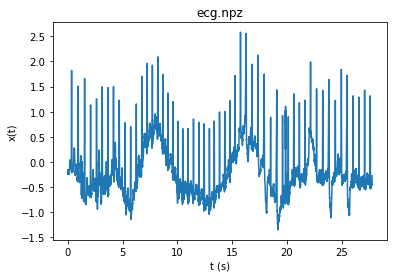

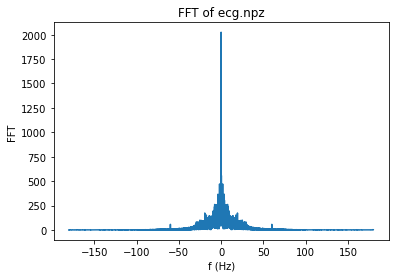

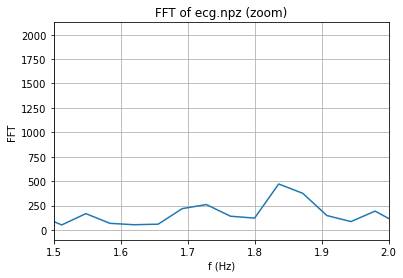

In [873]:
f = np.load("Data/ecg.npz")
f_s, x = float(f['fs']), f['x']

t = np.arange(len(x)) / f_s

pl.figure()
pl.title("ecg.npz")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of ecg.npz")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")

pl.figure()
pl.grid()
pl.title("FFT of ecg.npz (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(1.5, 2)

f.close()

The BPM has a frequency of a few Hz and the frequency of this amount with maximum amplitude is $1.83$ Hz (see above). So the avergae BPM is $1.83 * 60 = 110$ beats/minute.

The noise is situated below $100$ Hz.

#### conso.npz

(0.0, 259200.0)

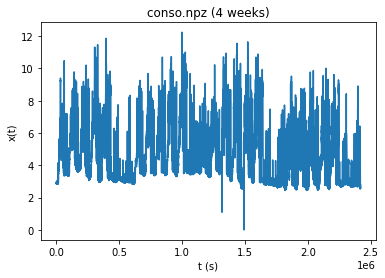

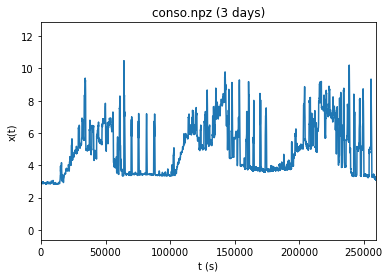

In [874]:
f = np.load("Data/conso.npz")
f_s, x = float(f['fs']), f['x']

t = np.arange(len(x)) / f_s

pl.figure()
pl.title("conso.npz (4 weeks)")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")

pl.figure()
pl.title("conso.npz (3 days)")
pl.plot(t, x, '-')
pl.xlabel("t (s)")
pl.ylabel("x(t)")
pl.xlim(0, 3 * 3600 * 24)

On the last two graphs, we can see periodic patterns which correspond to days and weeks because it uses less power at night and during week-ends.

(0.0, 25000.0)

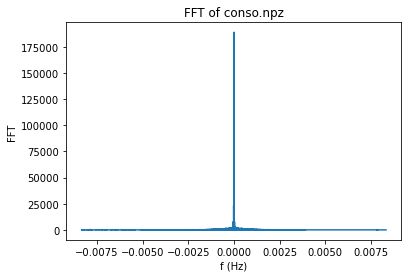

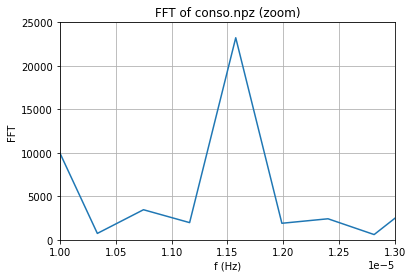

In [875]:
x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of conso.npz")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
#pl.xlim(-0.00005, 0.00005)

pl.figure()
pl.grid()
pl.title("FFT of conso.npz (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(0.00001, 0.000013)
pl.ylim(0, 25000)

Above, we can see the frequency $1,16.10^{-5}$ Hz which corresponds to $\frac 1{60 * 60 * 24}$ i.e. a day. It is the main frequency of the spectrum, which is normal because a day is the smallest periodicity for the building.

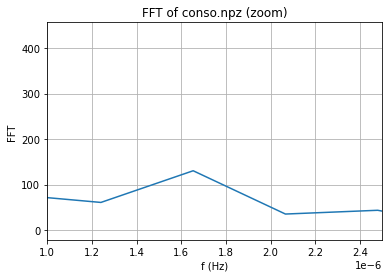

In [876]:
pl.figure()
pl.grid()
pl.title("FFT of conso.npz (zoom)")
pl.plot(freqs, np.sqrt(abs(x_fft)))
pl.xlabel("f (Hz)")
pl.ylabel("FFT")
pl.xlim(0.000001, 0.0000025)

f.close()

And finally we got the frequecy $1,65.10^{-6}$ Hz, which corresponds to a week.

## 3 Digital filtering

### 3.1 Ideal filtering

#### Question 1

Text(0.5, 0, 't (s)')

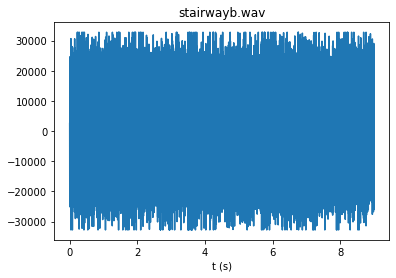

In [877]:
f_s, x = scipy.io.wavfile.read("Data/stairwayb.wav")

t = np.arange(len(x)) / f_s
pl.figure()
pl.plot(t, x)
pl.title("stairwayb.wav")
pl.xlabel("t (s)")

We can't see anything, there is so much noise !

#### Question 2

(3995.0, 4005.0)

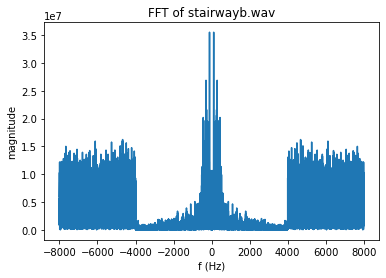

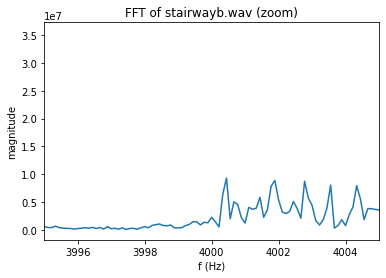

In [878]:
x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of stairwayb.wav")
pl.plot(freqs, np.sqrt(np.real(x_fft) ** 2 + np.imag(x_fft) ** 2))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")

pl.figure()
pl.title("FFT of stairwayb.wav (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(3995, 4005)

$f_c = 4000$ Hz seems to be a good cutoff frequency to cut the noise with an ideal low-pass filter because the frequency band of the noise starts a bit after $f_c$ (see above).

#### Question 3

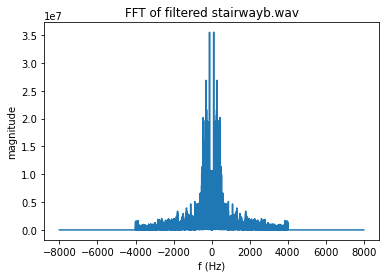

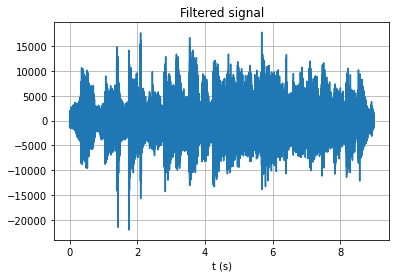

In [879]:
f_c = 4000

x_fft_cut = (abs(freqs) < f_c) * x_fft

pl.figure()
pl.title("FFT of filtered stairwayb.wav")
pl.plot(freqs, abs(x_fft_cut))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")

x_fft_cut = np.fft.ifftshift(x_fft_cut)
x_cut = np.fft.ifft(x_fft_cut).real

t = np.arange(len(x_cut)) / f_s
pl.figure()
pl.grid()
pl.plot(t, x_cut)
pl.title("Filtered signal")
pl.xlabel("t (s)")

x_cut_fft = np.fft.fft(x_cut)
x_cut_fft = np.fft.fftshift(x_cut_fft)

# To avoid clipping (the signal's maximum amplitude is a bit less than 25000)
x_cut = x_cut / 25000
sp.io.wavfile.write("stairwayb_denoised.wav", f_s, x_cut)

Now it's way better, we can finally see the signal's shape !

#### Question 4

(180.0, 230.0)

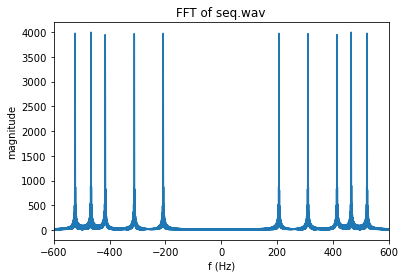

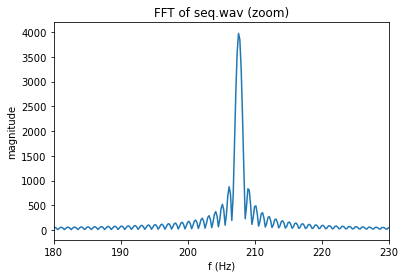

In [880]:
f_s, x = scipy.io.wavfile.read("Data/seq.wav")

x_fft = np.fft.fft(x)
x_fft = np.fft.fftshift(x_fft)
freqs = np.fft.fftfreq(len(x), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of seq.wav")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(-600, 600)

pl.figure()
pl.title("FFT of seq.wav (zoom)")
pl.plot(freqs, abs(x_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(180, 230)

We can clearly see the five notes. Moreover, we can see that a note is mostly contained in a spike which spreads of about 20 Hz on each side. Thus, we can apply an ideal band-pass filter centered around $f_{56}$ to isolate the lower note.

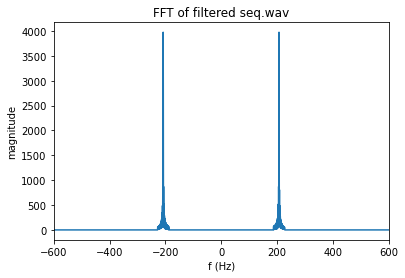

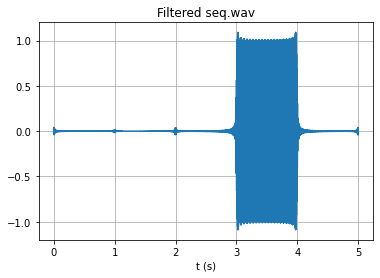

In [881]:
band = 20
f_56 = 440 * 2**((56 - 69) / 12)

x_fft_cut = (f_56 - band < abs(freqs)) * (abs(freqs) < f_56 + band) * x_fft

pl.figure()
pl.title("FFT of filtered seq.wav")
pl.plot(freqs, abs(x_fft_cut))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(-600, 600)

x_fft_cut = np.fft.ifftshift(x_fft_cut)
x_cut = np.fft.ifft(x_fft_cut).real

t = np.arange(len(x_cut)) / f_s
pl.figure()
pl.grid()
pl.plot(t, x_cut)
pl.title("Filtered seq.wav")
pl.xlabel("t (s)")

sp.io.wavfile.write("seq_filtered.wav", f_s, x_cut)

Now, we only hear the lower note !

#### Question 5

(0.0, 0.05)

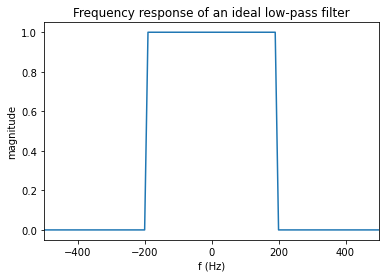

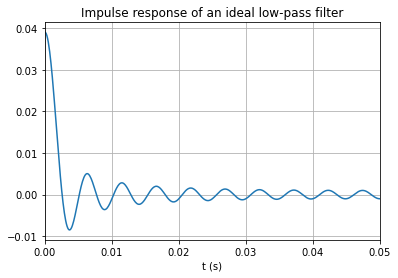

In [882]:
f_c = 200
f_s = 10000

freqs = np.fft.fftfreq(1000, 1 / f_s)
freqs = np.fft.fftshift(freqs)
resp = abs(freqs) < f_c

pl.figure()
pl.title("Frequency response of an ideal low-pass filter")
pl.plot(freqs, resp)
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(-500, 500)

resp = np.fft.ifftshift(resp)
impulse = np.fft.ifft(resp).real

t = np.arange(len(impulse)) / f_s
pl.figure()
pl.grid()
pl.plot(t, impulse)
pl.title("Impulse response of an ideal low-pass filter")
pl.xlabel("t (s)")
pl.xlim(0, 0.05)

(0.0, 0.001)

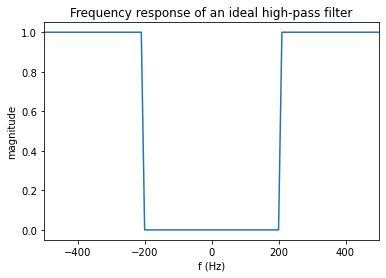

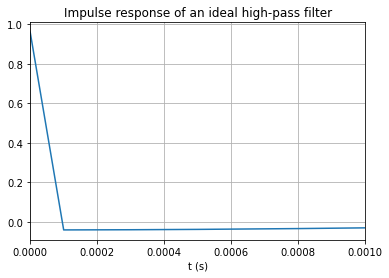

In [883]:
f_c = 200
f_s = 10000

freqs = np.fft.fftfreq(1000, 1 / f_s)
freqs = np.fft.fftshift(freqs)
resp = abs(freqs) > f_c

pl.figure()
pl.title("Frequency response of an ideal high-pass filter")
pl.plot(freqs, resp)
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(-500, 500)

resp = np.fft.ifftshift(resp)
impulse = np.fft.ifft(resp).real

t = np.arange(len(impulse)) / f_s
pl.figure()
pl.grid()
pl.plot(t, impulse)
pl.title("Impulse response of an ideal high-pass filter")
pl.xlabel("t (s)")
pl.xlim(0, 0.001)

### 3.2 Digital filter design

#### Question 1

In [884]:
f_c = 0.2

b, a = sp.signal.butter(2, f_c, fs = 1)

print("a =", a)
print("b =", b)

a = [ 1.         -0.36952738  0.19581571]
b = [0.20657208 0.41314417 0.20657208]


#### Question 2

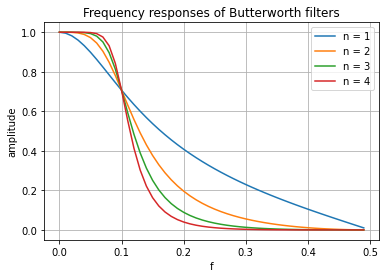

In [885]:
def freq_resp(a, b, f):
    num = sum([b[k] * np.exp(- 1j * 2 * np.pi * f * k) for k in range(len(b))])
    den = sum([a[k] * np.exp(- 1j * 2 * np.pi * f * k) for k in range(len(a))])
    frac = num / den
    return frac

freqs = np.arange(50) / 100
pl.figure()
pl.grid()
pl.title("Frequency responses of Butterworth filters")
for n in range(1, 5):
    b, a = sp.signal.butter(n, f_c)
    resp = freq_resp(a, b, freqs)
    pl.plot(freqs, abs(resp), label = "n = {}".format(n))
    pl.xlabel("f")
    pl.ylabel("amplitude")
pl.legend()
        

We can see that it approches the ideal filter as n goes up. Also, it is more and more flat around 0 and there are no oscillations.

#### Question 3

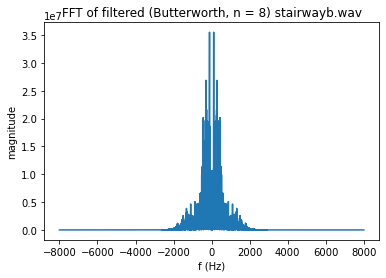

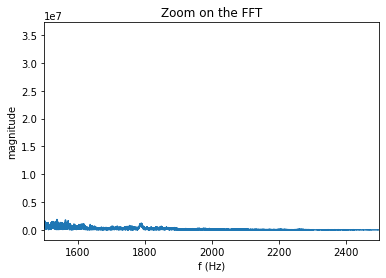

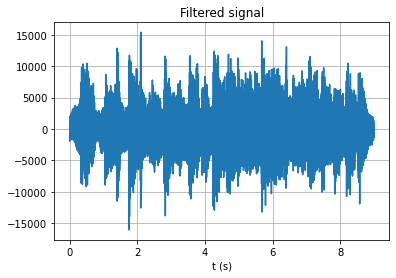

In [886]:
n = 8

f_s, x = scipy.io.wavfile.read("Data/stairwayb.wav")

b, a = sp.signal.butter(n, f_c)
x_cut = sp.signal.lfilter(b, a, x)

x_cut_fft = np.fft.fft(x_cut)
x_cut_fft = np.fft.fftshift(x_cut_fft)

freqs = np.fft.fftfreq(len(x_cut_fft), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of filtered (Butterworth, n = {}) stairwayb.wav".format(n))
pl.plot(freqs, abs(x_cut_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")

pl.figure()
pl.title("Zoom on the FFT".format(n))
pl.plot(freqs, abs(x_cut_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(1500, 2500)

t = np.arange(len(x_cut)) / f_s
pl.figure()
pl.grid()
pl.plot(t, x_cut)
pl.title("Filtered signal")
pl.xlabel("t (s)")

x_cut = x_cut / 18000
sp.io.wavfile.write("stairwayb_denoised_butterworth.wav", f_s, x_cut)

The equivalent cutoff frequency is $0.2 * \frac{f_s}2 = 0.2 * 8000 = 1600$ Hz. 
<br>We need to take a filter of order at least 8 for the noise to be well attenuated However, the cutoff frequency is pretty low, which cuts some harmonics of the sound.

#### Question 4

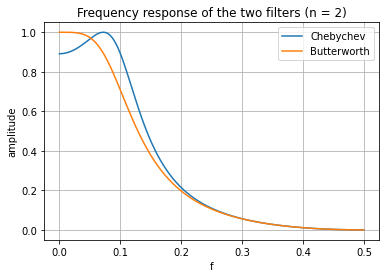

In [887]:
n = 2
ripple = 1

freqs = np.arange(500) / 1000

pl.figure()

b, a = sp.signal.cheby1(n, ripple, f_c)

resp = freq_resp(a, b, freqs)
pl.plot(freqs, abs(resp), label = "Chebychev")

b, a = sp.signal.butter(n, f_c)
resp = freq_resp(a, b, freqs)
pl.plot(freqs, abs(resp), label = "Butterworth")

pl.title("Frequency response of the two filters (n = 2)")
pl.grid()
pl.xlabel("f")
pl.ylabel("amplitude")
pl.legend()

The Butterworth filter is flatter around 0 while the Chebychev filter decreases a bit faster.

#### Question 5

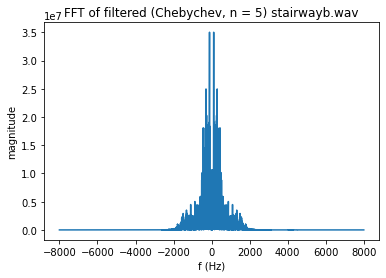

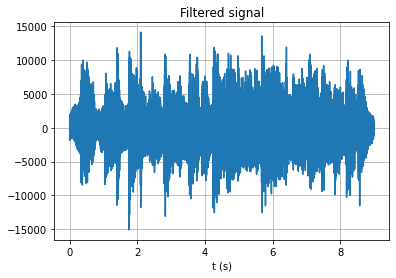

In [888]:
n = 5

f_s, x = scipy.io.wavfile.read("Data/stairwayb.wav")

b, a = sp.signal.cheby1(n, ripple, f_c)
x_cut = sp.signal.lfilter(b, a, x)

x_cut_fft = np.fft.fft(x_cut)
x_cut_fft = np.fft.fftshift(x_cut_fft)

freqs = np.fft.fftfreq(len(x_cut_fft), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of filtered (Chebychev, n = {}) stairwayb.wav".format(n))
pl.plot(freqs, abs(x_cut_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")

t = np.arange(len(x_cut)) / f_s
pl.figure()
pl.grid()
pl.plot(t, x_cut)
pl.title("Filtered signal")
pl.xlabel("t (s)")

x_cut = x_cut / 18000
sp.io.wavfile.write("stairwayb_denoised_chebychev.wav", f_s, x_cut)

With this filter, we only need an order 5 to reasonably cut the noise

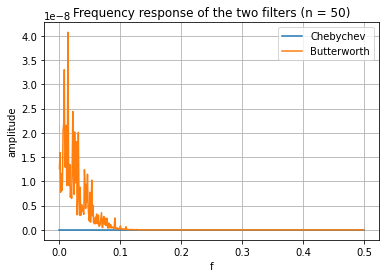

In [889]:
n = 50
ripple = 1

freqs = np.arange(500) / 1000

pl.figure()

b, a = sp.signal.cheby1(n, ripple, f_c)

resp = freq_resp(a, b, freqs)
pl.plot(freqs, abs(resp), label = "Chebychev")

b, a = sp.signal.butter(n, f_c)
resp = freq_resp(a, b, freqs)
pl.plot(freqs, abs(resp), label = "Butterworth")

pl.title("Frequency response of the two filters (n = 50)")
pl.grid()
pl.xlabel("f")
pl.ylabel("amplitude")
pl.legend()

With $n = 50$, we can see than the frequence response of this filter is $0$. I think it is caused by propagated numerical approximations when evaluating the denominator of the transfer function close to some poles.
<br>For the Butterworth filter, it still look like a frequency response, but we can see that it is already unreliable with a lot of noise before the cutoff frequency. Thus, the Butterworth filter is more robust to numerical errors than the Chebychev one.

### 3.3 Source separation and denoising

#### Question 1

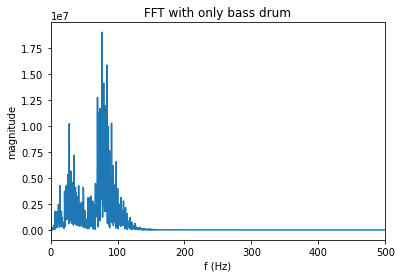

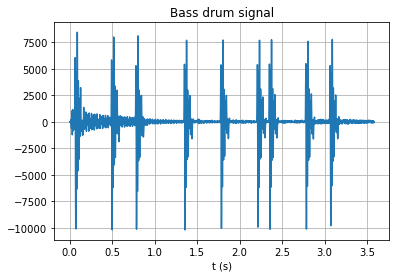

In [890]:
n = 8
f_c = 100 / 8000

f_s, x = scipy.io.wavfile.read("Data/drum.wav")

b, a = sp.signal.butter(n, f_c)
x_cut = sp.signal.lfilter(b, a, x)

x_cut_fft = np.fft.fft(x_cut)
x_cut_fft = np.fft.fftshift(x_cut_fft)

freqs = np.fft.fftfreq(len(x_cut_fft), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT with only bass drum")
pl.plot(freqs, abs(x_cut_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(0, 500)

t = np.arange(len(x_cut)) / f_s
pl.figure()
pl.grid()
pl.plot(t, x_cut)
pl.title("Bass drum signal")
pl.xlabel("t (s)")

x_cut = x_cut / 10000
sp.io.wavfile.write("low_drum.wav", f_s, x_cut)

The volume is pretty low but thanks to a Butterworth low-pass filter of cutoff frequency $100$ Hz, I extracted the frequencies of the bass drum, which allows us to separate it from the cymbal. By cutting high frequencies, I also cut some harmonics, which is why it sounds a bit strange.

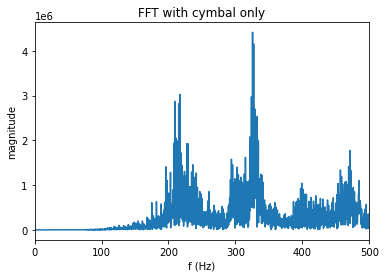

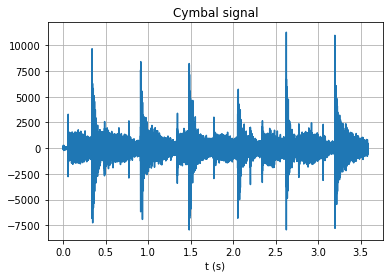

In [891]:
n = 8
f_c = 200 / 8000

f_s, x = scipy.io.wavfile.read("Data/drum.wav")

b, a = sp.signal.butter(n, f_c, 'high')
x_cut = sp.signal.lfilter(b, a, x)

x_cut_fft = np.fft.fft(x_cut)
x_cut_fft = np.fft.fftshift(x_cut_fft)

freqs = np.fft.fftfreq(len(x_cut_fft), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT with cymbal only")
pl.plot(freqs, abs(x_cut_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")
pl.xlim(0, 500)

t = np.arange(len(x_cut)) / f_s
pl.figure()
pl.grid()
pl.plot(t, x_cut)
pl.title("Cymbal signal")
pl.xlabel("t (s)")

x_cut = x_cut / 10000
sp.io.wavfile.write("high_drum.wav", f_s, x_cut)

Here, I only kept the frequencies of the cymbal with a Butterworth high-pass filter of cutoff frequency $200$ Hz.

#### Question 2

Text(0.5, 0, 't (s)')

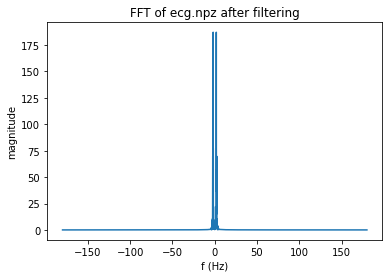

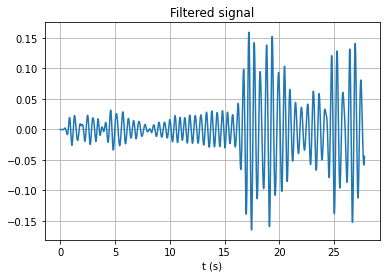

In [892]:
n = 8

f = np.load("Data/ecg.npz")
f_s, x = float(f['fs']), f['x']

f_c = 2 / (f_s / 2)

b, a = sp.signal.butter(n, f_c, 'high')
d, c = sp.signal.butter(n, f_c, 'low')

x_cut = sp.signal.lfilter(b, a, x)
x_cut = sp.signal.lfilter(d, c, x_cut)

x_cut_fft = np.fft.fft(x_cut)
x_cut_fft = np.fft.fftshift(x_cut_fft)

freqs = np.fft.fftfreq(len(x_cut_fft), 1 / f_s)
freqs = np.fft.fftshift(freqs)

pl.figure()
pl.title("FFT of ecg.npz after filtering")
pl.plot(freqs, abs(x_cut_fft))
pl.xlabel("f (Hz)")
pl.ylabel("magnitude")

t = np.arange(len(x_cut)) / f_s
pl.figure()
pl.grid()
pl.plot(t, x_cut)
pl.title("Filtered signal")
pl.xlabel("t (s)")

I cut the frequencies higher than 2 (the BPM is usually lower) to keep only the heartbeats.

## Personal discussion

It was fun to apply the theory to some real signals. However, I would have liked to apply it to images too.
<br> It took me some time to understand how each library work but now I feel like loading a random signal (with good file format) and taking a look at its spectrum is pretty easy.

Ps : I submitted a first version in time but I realized that I had left a small mistake at the end of part 2, which is why this version is submitted 10 minutes late.